In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#QUESTION 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as time
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('Data_oscillator.csv')
data.columns = ['t', 'x', 'dx', 'ddx']

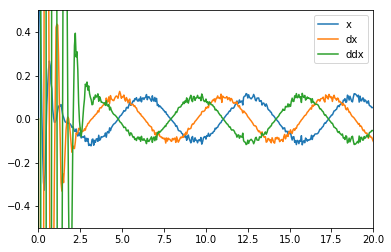

In [4]:
plt.figure()
plt.plot(data['t'],data['x'])
plt.plot(data['t'],data['dx'])
plt.plot(data['t'],data['ddx'])
plt.xlim((0,20))
plt.ylim((-0.5,0.5))
plt.legend()
plt.show()

In [5]:
#Recursive least square function
#X is n_samples x p_features
#Y is n_samples x 1
def rls(X,Y,lamb=0.98,delt=1e12): 
    if len(X.shape)==1: 
        X = np.asmatrix(X).T
        p = 1
    else: 
        X = np.asmatrix(X)
        p = X.shape[1]
    
    Y = np.asmatrix(Y).T
       
    n = len(Y)    
    A = np.empty((1,p))
    P = delt*np.eye(p)
    A_tot = np.empty((1,p))

    for i in np.arange(0,n,1): 
        y = np.dot(X[i,:], A.T)
        K = np.dot(P, X[i,:].T)/(lamb + np.dot(X[i,:],np.dot(P,X[i,:].T)))
        P = 1/lamb*(P - np.dot(K,np.dot(X[i,:],P)))
        A = A + np.dot((Y[i]-y).T,K.T)
        A_tot = np.concatenate((A_tot, A), axis=0)
    
    A_tot = np.delete(A_tot,0,axis=0)
    return A_tot

In [6]:
#Question 2a: RLS given ddx, dx, w1
a = 10
data['cos_t'] = np.cos(data['t'])
YA = data['ddx'] - a*data['cos_t']
XA = data[['x', 'dx']]

start = time.time()
A_totA = rls(XA,YA)
t1 = time.time() - start

omega = 9.91784548114921
zeta = 2.5672065574624385
run_time= 0.24960041046142578


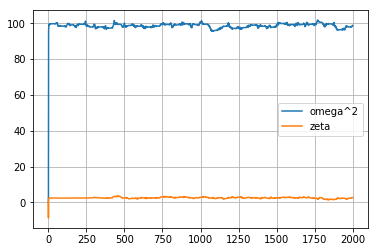

In [7]:
print('omega =', np.mean(np.sqrt(-A_totA[-9:,0])))
print('zeta =', np.mean(-A_totA[-9:,1]/2))
print('run_time=', t1)

plt.figure()
plt.plot(np.arange(0,len(XA),1), -A_totA[:,0], label='omega^2')
plt.plot(np.arange(0,len(XA),1), -A_totA[:,1]/2, label='zeta')
plt.grid()
plt.legend()
plt.show()

In [8]:
# Classical linear regression
start = time.time()
linreg = LinearRegression()
linreg.fit(XA,YA)
t2 = time.time() - start
print('omega =', np.sqrt(-linreg.coef_[0]))
print('zeta =', -linreg.coef_[1]/2)
print('run_time =',t2)

omega = 9.935350996201594
zeta = 2.4507580336788934
run_time = 0.0


In [9]:
#Question 2b: dx_num, ddx_num

data['dx_num'] = np.gradient(data['x'], data['t'], edge_order=2)
data['ddx_num'] = np.gradient(data['dx_num'], data['t'], edge_order=2)

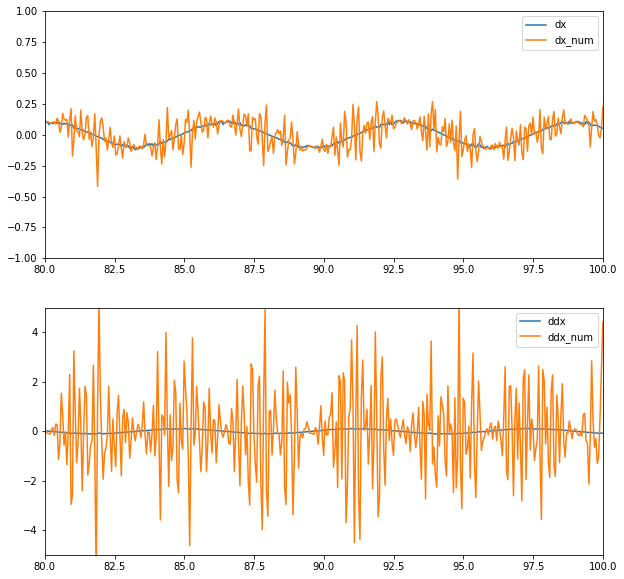

In [10]:
#check dx_num and ddx_num
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(data['t'],data['dx'])
plt.plot(data['t'],data['dx_num'])
plt.xlim((80,100))
plt.ylim((-1,1))
plt.legend()

plt.subplot(2,1,2)
plt.plot(data['t'],data['ddx'])
plt.plot(data['t'],data['ddx_num'])
plt.xlim((80,100))
plt.ylim((-5,5))
plt.legend()
plt.show()

In [11]:
YB = data['ddx_num'] - a*data['cos_t']
XB = data[['x', 'dx_num']]
start = time.time()
A_totB = rls(XB,YB)
t3 = time.time() - start

omega = 9.987054842506804
zeta = 1.1289364464262541
run_time = 0.2652003765106201


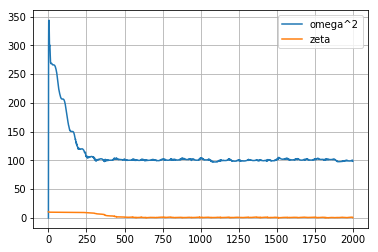

In [12]:
print('omega =', np.mean(np.sqrt(-A_totB[-9:,0])))
print('zeta =', np.mean(-A_totB[-9:,1]/2))
print('run_time =', t3)

plt.figure()
plt.plot(np.arange(0,len(XB),1), -A_totB[:,0], label='omega^2')
plt.plot(np.arange(0,len(XB),1), -A_totB[:,1]/2, label='zeta')
plt.grid()
plt.legend()
plt.show()

In [13]:
#Question 2c: unknown w1
data2 = pd.read_csv('Data_oscillator_version2.csv')
data2.columns = ['t', 'x', 'dx', 'ddx']

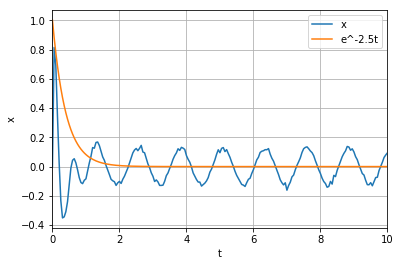

In [14]:
#Complementary part attenuates fast
plt.figure()
plt.plot(data2['t'],data2['x'])
plt.plot(data2['t'],np.exp(-2.5*data2['t']),label='e^-2.5t')
plt.xlabel('t')
plt.ylabel('x')
plt.xlim((0,10))
plt.ylim()
plt.grid()
plt.legend()
plt.show()

In [15]:
XC1 = data2['x']
YC1 = data2['ddx']

# ddx ~ x to find w1
start = time.time()
A_totC1 = rls(XC1,YC1,lamb=0.985)

# ddx+omega^2x-10cosw1t ~ dx to find zeta
w1 = np.sqrt(-A_totC1[-1,0])
omega = 2*w1
data2['cos_w1t'] = np.cos(w1*data2['t'])

YC2 = data2['ddx'] + (omega**2)*data2['x'] - a*data2['cos_w1t']
XC2 = data2['dx']
A_totC2 = rls(XC2,YC2,lamb=0.985)
t4 = time.time() - start

w1 = 10.16814438373058
omega = 20.33628876746116
zeta = 2.7712023337579725
run_time = 0.4368007183074951


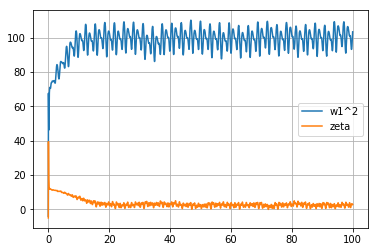

In [18]:
print('w1 =', w1)
print('omega =', omega)
print('zeta =', np.mean(-A_totC2[-1:,0]/2))
print('run_time =', t4)

plt.figure()
plt.plot(data2['t'],-A_totC1,label='w1^2')
plt.plot(data2['t'],-A_totC2/2,label='zeta')
plt.legend()
plt.grid()
plt.show()